<a href="https://colab.research.google.com/github/matildapedretti-beep/Text-Media/blob/main/INFOMTMA_Midterm_2526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text and Media Analytics (INFOMTMA)

## Midterm Take-Home Exam

### Deadline: Monday December 15 2025, 9:00

The midterm take-home exam for the Text and Media Analytics course consists of **two assignments** with six questions in total that require you to write working code blocks that produce results, and to write a discussion of the results. Each answer is evaluated on the quality of the code or code edits (as far as you were asked to write new code), whether the required results are produced, and the quality of the discussion, where applicable. Make sure your code is clearly structured and properly signposted. Explain via commenting each step. The scores for the questions add up to 100, with scores per question indicated next to the header of the question.

Please submit your Jupyter notebook file (`.ipynb`) via Brightspace. Do not submit a link to a Google Colab -- but keep in mind that your notebooks should run on the Colab, because that is how we will evaluate it.

# Exercise 1: Text analysis (70 points total)

All questions in this exercise deal with the Patronizing and condescending language detection dataset (https://sites.google.com/view/pcl-detection-semeval2022/). This dataset features paragraphs that are extracted from news articles from a range of outlets, which may contain one or more instances of patronizing or condenscending language targeting a set of predefined vulnerable communities. To know more about these data, you can check the link to the dataset.

Let's start by loading the data:

In [ ]:
import pandas as pd

! wget https://gist.githubusercontent.com/fkunneman/c0ef16b0052f1c2414683dd1d30c960a/raw/01deb36cca06ed13e0c613513353c5ea6337a1c4/dontpatronizeme_pcl.tsv

df = pd.read_csv('dontpatronizeme_pcl.tsv',delimiter='\t',header=None)
df.head()

--2025-11-27 07:55:19--  https://gist.githubusercontent.com/fkunneman/c0ef16b0052f1c2414683dd1d30c960a/raw/01deb36cca06ed13e0c613513353c5ea6337a1c4/dontpatronizeme_pcl.tsv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3122005 (3.0M) [text/plain]
Saving to: ‘dontpatronizeme_pcl.tsv’

dontpatronizeme_pcl 100%[===================>]   2.98M  --.-KB/s    in 0.07s   

2025-11-27 07:55:19 (40.3 MB/s) - ‘dontpatronizeme_pcl.tsv’ saved [3122005/3122005]



,0,1,2,3,4,5
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


More information about the data can be seen in the readme:

In [ ]:
! wget https://gist.githubusercontent.com/fkunneman/2de27cdcd7160a80c3b0482ffd793cbd/raw/23917b9ecbd651150499f08223f8692dd7ede798/README_training.txt

with open('README_training.txt','r',encoding='utf-8') as file_in:
  print(file_in.read())

--2025-11-27 07:55:27--  https://gist.githubusercontent.com/fkunneman/2de27cdcd7160a80c3b0482ffd793cbd/raw/23917b9ecbd651150499f08223f8692dd7ede798/README_training.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5302 (5.2K) [text/plain]
Saving to: ‘README_training.txt’

README_training.txt 100%[===================>]   5.18K  --.-KB/s    in 0s      

2025-11-27 07:55:27 (38.1 MB/s) - ‘README_training.txt’ saved [5302/5302]

					######################## SEMEVAL 2022 INFORMATION ###########################
					# If you are participating on SemEval 2022-Task 4, this is the training     #
					# set provided for the task (there are no trial and no dev sets provided).  #
					# The full test set can be made avaiable upon request after SemEval 2022    #
	

### Question 1: Exploration (20 points)

First, do an exploratory analysis:

1) (6 points) What are the labels and what do they mean? Transform these labels into a binary labeling, as advised in the README. Then start analyzing frequencies and associations:
  - 1: How many instances are there per label?
  - 2: What is the distribution of keywords (the 3rd column, see readme)?
  - 3: What is the relation between the keyword column and binary labels? In other words: are certain keywords particularly associated with one of the two labels? How do you interpret these numbers?

2) (7 points) Compare both labels in the following way: print out the 10 most used adjectives, 10 most used adverbs and 10 most used verbs in both categories and reflect on whether these lists tell us anything insightful about each of the categories and the distinction between them. Discuss the limitations of these insights as well. What additional analyses would be needed for more insightful results?

3) (7 points) Now analyze the textual messages (the text column). You can choose the characteristic that you analyze yourself. What do you observe? Motivate why this helps to better understand the data, also with respect to the potential of / choice for a machine learning classifier.


The written answers combined should not exceed 350 words in total. For each of the subquestions, also support these with code.


In [ ]:
## YOUR ANSWER HERE


## Question 2: Classification (30 points)

Here, you will use a classifier to distinguish between the five levels of patronizing language in a newsreport. The task is to distinguish between the labels 0 to 4 (so not the binary labels that were analyzed in question 1).

The assignment is structured in the following way:

1. (12 points) Train two multi-class classifiers of your choice.
2. (6 points) Introduce a baseline classifier to compare your classifiers to.
3. (6 points) Choose and motivate the metrics you will use for performance evaluation.
4. (6 points) Compare the performance of your classifiers to the baseline and to each other.

The higher the performance of your classifiers (given the resources), the better! The more different your classifiers are, the better -- think of Transformer-based classifiers, models based on static word embeddings, tf-idf-based solutions and whatever else comes to your mind. Don't forget to evaluate on test data -- perform a ``train-test`` split. Don't exceed 200 words (non-code) in answering this question.

In [ ]:
## YOUR ANSWER HERE


## Question 3: Discussion (20 points)

Reflect on your solution for the previous question. Was the quality of your classifiers good? Is there a big gap between your two different classifiers, or between performance on different labels? Why do you think this is the case?

Suggest potential improvements: What would you do to get the classification to work better? Think about properties of the data, properties of the model, properties of the training process. (300 words max)

In [ ]:
## YOUR ANSWER HERE

# Exercise 2: Visual media analysis (30 points total)


All images for this exercise are sampled from online news articles about artificial intellgience (sources: NOS, NU.nl, New York times, Reuters). It's around 200 images - not an aweful lot but sufficient for some automated analysis and clustering. You can find the data in a ZIP folder on Brightspace under **CONTENT-> LECTURE SLIDES & MATERIALS -> IMAGES_TMA.ZIP**.

Place the ZIP in your Colab environment and execute the steps below.

The main question to that this exercise links is: *How do news media visually frame AI?*

**This Exercise has three components:**

- Enrich the dataset with features from the images, using e.g., colours, shapes, and objects.

- Cluster the images using at least two different approaches based on the features you select (e.g., K-Means, hierarchical clustering, PCA + K-Means, UMAP + DBSCAN).

- Try to label your clusters with an explanation (i.e., why cluster X should be labelled as Y?). Reflect on the process of clustering images based on their "content-features" (structure, atrributes, objects etc.). What are the main obstacles and important considerations for developing a working analytical pipeline? Where do these "inductive" approaches (using unsupervised ML) have strenghts/benefits, when do they have clear limitations?

For this exercise, you can go different paths. There is no 'perfect' clustering approach or only one correct 'solution'. It is more about critically exploring different paths and reflecting on the potentials and limitations to use data science for these sorts of questions.

In [ ]:
#first, let's load the data and do some preprocessing:
!pip -q install pillow-heif tqdm pandas opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.9 MB/s eta 0:00:00


In [ ]:
#just execute this - no other action needed for this code block!
from pathlib import Path
from PIL import Image
from pillow_heif import read_heif
import pandas as pd
import hashlib, shutil, time, zipfile
from tqdm import tqdm

#unzip and define roots
ZIP_PATH = Path("/content/IMAGES_TMA.zip")
EXTRACT_ROOT = Path("/content/IMAGES_TMA")

if not EXTRACT_ROOT.exists():
    EXTRACT_ROOT.mkdir(parents=True, exist_ok=True)
    with zipfile.ZipFile(ZIP_PATH, 'r') as zf:
        zf.extractall(EXTRACT_ROOT)
    print(f"Extracted {ZIP_PATH} to {EXTRACT_ROOT}")
else:
    print(f"Extraction folder already exists: {EXTRACT_ROOT}")
.
SRC_ROOT = EXTRACT_ROOT

OUT_DIR = SRC_ROOT / "processed_jpg"
OUT_DIR.mkdir(parents=True, exist_ok=True)

#outlet folder names
OUTLET_NAMES = {"NOS", "NU.NL", "NYT", "Reuters"}

print("Configured outlet names:", OUTLET_NAMES)


#file types
IMG_EXTS = {".jpg", ".jpeg", ".png", ".heic", ".webp", ".avif"}

def sha1_of_file(path, chunk_size=1<<20):
    h = hashlib.sha1()
    with open(path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

#convert to jpg
def convert_or_copy_to_jpg(src_path: Path, outlet: str, out_dir: Path) -> Path:
    """
    Convert/copy to JPG under processed_jpg/<outlet>/...
    Rebuilds structure starting at the outlet folder.
    """
    parts = src_path.parts
    outlet_idx = next(i for i, part in enumerate(parts) if part == outlet)
    rel_from_outlet = Path(*parts[outlet_idx:])

    out_subdir = out_dir / rel_from_outlet.parent
    out_subdir.mkdir(parents=True, exist_ok=True)
    out_path = out_subdir / (src_path.stem + ".jpg")

    ext = src_path.suffix.lower()

    if ext == ".heic":
        heif = read_heif(str(src_path))
        img = Image.frombytes(heif.mode, heif.size, heif.data, "raw")
        img = img.convert("RGB")
        img.save(out_path, "JPEG", quality=95)

    elif ext in {".jpg", ".jpeg"}:
        if not out_path.exists():
            shutil.copy2(src_path, out_path)

    else:  #png, webp, avif, etc.
        img = Image.open(src_path).convert("RGB")
        img.save(out_path, "JPEG", quality=95)

    return out_path

#include only valid images
def iter_image_files(root: Path):
    """
    Yield only real image files that:
      - live under root
      - have extension in IMG_EXTS
      - path contains an outlet name
      - skip '__MACOSX', 'processed_jpg', and '._' junk files
    """
    for p in root.rglob("*"):
        if "__MACOSX" in p.parts:
            continue
        if "processed_jpg" in p.parts:
            continue
        if p.name.startswith("._"):
            continue
        if not p.is_file():
            continue
        if p.suffix.lower() not in IMG_EXTS:
            continue

        #detect outlet from any path component
        outlet = next((part for part in p.parts if part in OUTLET_NAMES), None)
        if outlet is None:
            continue

        yield p, outlet



#process all images (no EXIF)
records = []

all_items = list(iter_image_files(SRC_ROOT))
print(f"Found {len(all_items)} candidate image files under {SRC_ROOT}")

outlet_counters = {}

for p, outlet in tqdm(all_items, desc="Converting + cataloguing"):
    try:
        #increment outlet label counter
        count = outlet_counters.get(outlet, 0) + 1
        outlet_counters[outlet] = count
        image_label = f"{outlet}_{count}"

        #convert/copy to JPG
        out_jpg = convert_or_copy_to_jpg(p, outlet, OUT_DIR)

        orig_stat = p.stat()
        jpg_stat = out_jpg.stat()

        #dimensions
        with Image.open(out_jpg) as im:
            width, height = im.size

        records.append({
            "filename": p.name,
            "stem": p.stem,
            "src_ext": p.suffix.lower(),
            "src_path": str(p),
            "jpg_path": str(out_jpg),
            "width": width,
            "height": height,
            "filesize_bytes": jpg_stat.st_size,
            "modified_time": time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(orig_stat.st_mtime)),
            "created_time": time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(orig_stat.st_ctime)),
            "sha1": sha1_of_file(out_jpg),
            "outlet": outlet,
            "image_label": image_label
        })

    except Exception as e:
        print(f"[WARN] Failed on {p}: {e}")

df = pd.DataFrame.from_records(records)
df.head()


Extracted /content/IMAGES_TMA.zip to /content/IMAGES_TMA
Configured outlet names: {'NOS', 'NYT', 'Reuters', 'NU.NL'}
Found 198 candidate image files under /content/IMAGES_TMA


Converting + cataloguing: 100%|██████████| 198/198 [00:05<00:00, 33.24it/s]


,filename,stem,src_ext,src_path,jpg_path,width,height,filesize_bytes,modified_time,created_time,sha1,outlet,image_label
0,9.webp,9,.webp,/content/IMAGES_TMA/IMAGES_TMA/NYT/9.webp,/content/IMAGES_TMA/processed_jpg/NYT/9.jpg,1508,2048,744574,2025-11-28 12:07:06,2025-11-28 12:07:06,f2c7c4c535deef5242e50dfdff4a4ab746f7d715,NYT,NYT_1
1,26.webp,26,.webp,/content/IMAGES_TMA/IMAGES_TMA/NYT/26.webp,/content/IMAGES_TMA/processed_jpg/NYT/26.jpg,2048,1364,823332,2025-11-28 12:07:06,2025-11-28 12:07:06,e056518fe507b74d04a99032367a59adf2efd384,NYT,NYT_2
2,15.webp,15,.webp,/content/IMAGES_TMA/IMAGES_TMA/NYT/15.webp,/content/IMAGES_TMA/processed_jpg/NYT/15.jpg,2048,2048,1404757,2025-11-28 12:07:06,2025-11-28 12:07:06,2285c93735b85b56df9496e41d2c53f69335280d,NYT,NYT_3
3,45.webp,45,.webp,/content/IMAGES_TMA/IMAGES_TMA/NYT/45.webp,/content/IMAGES_TMA/processed_jpg/NYT/45.jpg,1673,2048,670931,2025-11-28 12:07:06,2025-11-28 12:07:06,586c383b8502063371f739c2c7c045696a258f8f,NYT,NYT_4
4,13.png,13,.png,/content/IMAGES_TMA/IMAGES_TMA/NYT/13.png,/content/IMAGES_TMA/processed_jpg/NYT/13.jpg,899,898,220722,2025-11-28 12:07:06,2025-11-28 12:07:06,f9e561a7975c8d0a7e8abe119030a0e14cab6ec0,NYT,NYT_5


## Question 1: Enrich the dataframe with image features (10 points)

Below are some examples for **selecting features** from the images themselves. You can choose any that you deem useful - **the below are merely suggestions!**

Also, apply **object detection** to enrich your image data. There are plenty of choices out there and we experimented with some in the seminars. What matters is how you justfy your choices and make them work. Summarise your choices and justify them (300 words max.).



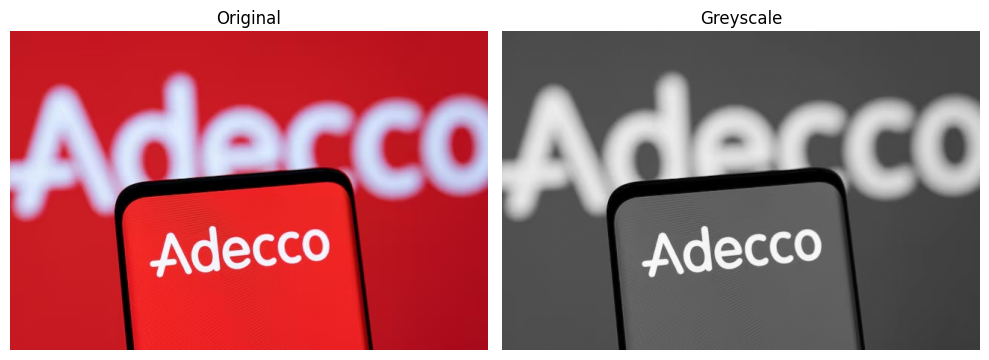

In [ ]:
#Example 1: Greyscaling

import random
import cv2
import matplotlib.pyplot as plt

# pick one random image
row = df.sample(1).iloc[0]
img_path = row['jpg_path']

# load in colour (BGR format)
img_bgr = cv2.imread(img_path)

# greyscale version
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# show both
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Greyscale")
plt.axis("off")

plt.tight_layout()
plt.show()


**Why grayscale?**

*   Simplicity: Colour adds 3 channels (R,G,B). For beginners, that triples data size with little added value if we just want shapes/textures.
*   Focus: Graffiti meaning usually comes from the marks and patterns rather than the exact colour.
*   Speed: Grayscale reduces dimensionality, making clustering and PCA faster and easier to visualise.

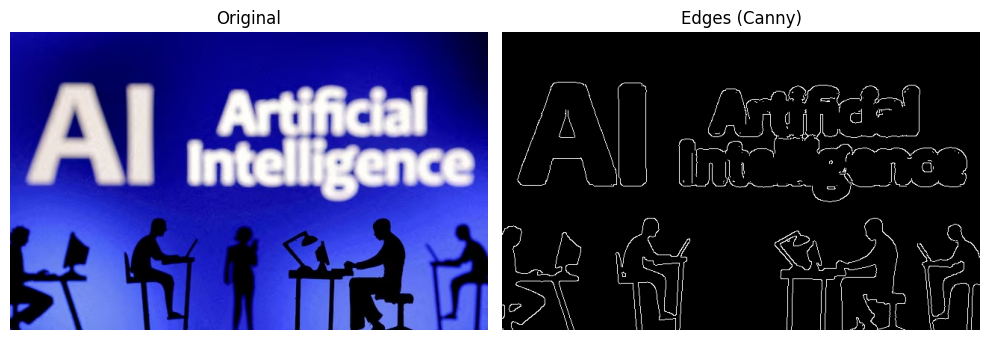

In [ ]:
#Example 2: Edge Detection

#pick one random image
row = df.sample(1).iloc[0]
img_path = row['jpg_path']

#load image
img_bgr = cv2.imread(img_path)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

#edge detection
edges = cv2.Canny(img_gray, threshold1=100, threshold2=200)

#display
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges, cmap="gray")
plt.title("Edges (Canny)")
plt.axis("off")

plt.tight_layout()
plt.show()


**Canny Edge Detection**


*   Detects edges by finding strong intensity changes in the image.
*   Uses gradient magnitude + thresholding to highlight object outlines and contours.
*   Produces a binary edge map (white = edge, black = no edge).
*   Useful for clustering because different image types have distinct edge patterns.








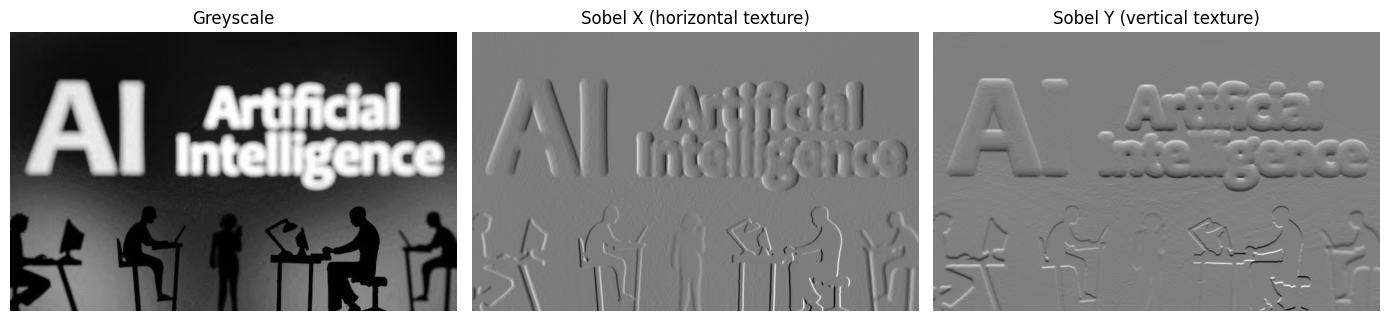

In [ ]:
#Example 3: Sobel filters (texture)
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)  #horizontal gradients
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)  #vertical gradients

#magnitude of gradients = overall texture strength
sobel_mag = cv2.magnitude(sobel_x, sobel_y)

#display
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap="gray")
plt.title("Greyscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sobel_x, cmap="gray")
plt.title("Sobel X (horizontal texture)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sobel_y, cmap="gray")
plt.title("Sobel Y (vertical texture)")
plt.axis("off")

plt.tight_layout()
plt.show()


**Sobel Texture Features**


*   Measures texture and structure by computing intensity gradients in the x- and y-direction.
*   Produces two gradient maps: Sobel X (detects vertical edges/horizontal changes) and Sobel Y (detects horizontal edges/vertical changes).
*   The combined gradient magnitude reflects overall texture strength.
*   Good for clustering because images differ in how “textured” or “smooth” they are.




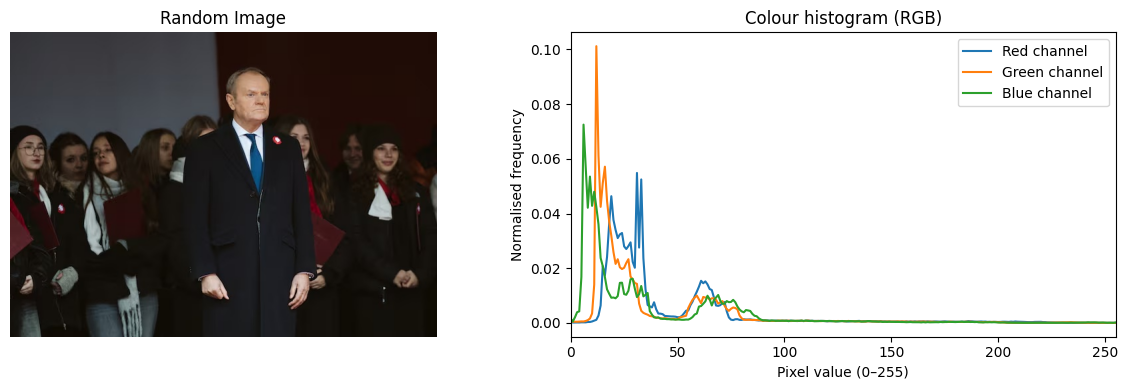

In [ ]:
#Example 3: Colour Historgrams
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load image as RGB
def load_rgb(path):
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise ValueError(f"Cannot read image: {path}")
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#pick one random image
row = df.sample(1).iloc[0]
img_path = row["jpg_path"]

img_rgb = load_rgb(img_path)

#compute per-channel histograms (256 bins each)
hist_size = 256
hist_range = [0, 256]

hist_r = cv2.calcHist([img_rgb], [0], None, [hist_size], hist_range)
hist_g = cv2.calcHist([img_rgb], [1], None, [hist_size], hist_range)
hist_b = cv2.calcHist([img_rgb], [2], None, [hist_size], hist_range)

#normalise (optional)
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

#visualise: original image + histograms
fig, (ax_img, ax_hist) = plt.subplots(1, 2, figsize=(12, 4))

#left: image
ax_img.imshow(img_rgb)
ax_img.set_title("Random Image")
ax_img.axis("off")

#right: RGB histograms
bins = np.arange(hist_size)

ax_hist.plot(bins, hist_r, label="Red channel")
ax_hist.plot(bins, hist_g, label="Green channel")
ax_hist.plot(bins, hist_b, label="Blue channel")
ax_hist.set_xlim([0, 255])
ax_hist.set_xlabel("Pixel value (0–255)")
ax_hist.set_ylabel("Normalised frequency")
ax_hist.set_title("Colour histogram (RGB)")
ax_hist.legend()

plt.tight_layout()
plt.show()


**Colour Histograms**


*   Summarise an image based on the distribution of colours (how often each colour appears).
*   Typically computed in RGB (or HSV) using a fixed number of bins per channel (e.g. 8×8×8 = 512 values).
Produces a compact numerical fingerprint of the image’s overall colour palette.
*   Useful for clustering because images with similar dominant colours (e.g. blue screens, orange robotics labs, dark server rooms) naturally group together.





In [ ]:
#ANSWER: your feature selection & data enrichment

**ANSWER: Provide a short summary and justification of your choices here!**

## Question 2: Cluster the images (10 points)

Now that you have selected your features, **try clustering the images with at least two clustering techniques of your choice** (e.g., K-Means, hierarchical clustering, PCA + K-Means, UMAP + DBSCAN).

**Try different cluster solutions** as well and, where applicable, explain/motivate your choice for the number of clusters.

**Present examples for some of the clusters** (what do the images look like in a given cluster?). You don't need to show examples for all clusters across the min. 2 techniques but can choose yourself which one you want to show.

**Discuss why you chose the clustering techniques** that you eventually applied - what considerations guided your choices? (300 words max).



In [ ]:
#ANSWER: your clustering & examples

**ANSWER: Provide a short summary and justification of your choices here!**

## Question 3: Try Labelling the Clusters and Discussion (10 points)

**Try to label your clusters** with an explanation (i.e., why cluster X should be labelled as Y?). Present your results - if you have too many clusters, make a selection of 3-5 that you want to show.

**Provide some descriptive analyses of your clusters** (e.g., distribution, what outlets they relate to, representative images per cluster).

**Reflect on the process of clustering images based on their "content-feature**s" (structure, atrributes, objects etc.). What are the main obstacles and important considerations for developing a working analytical pipeline? Where do these "inductive" approaches (using unsupervised ML) have strenghts/benefits, when do they have clear limitations? (500 words max.)

**ANSWER: Provide a short summary and justification of your choices here!**

In [ ]:
#ANSWER: your analysis of clusters